In [1]:
from Controllers import PID_controller
pid = PID_controller(6, 0.015, 0, 0, 0.1)
pid.set_CV_limit(0, 10)

In [2]:
from Objects import Inertial_Object
K = [[2]]
T = [[5]]
obj = Inertial_Object(time_const=T, gain=K, sampling_time=0.1)

In [3]:
for t in range(0, 100):
    pid.set_setpoint(3) if t > 30 else pid.set_setpoint(0)
    pv = obj.get_output_hist()[-1][0][0]
    cv = pid.simulate_step(pv)
    obj.simulate_step(cv)

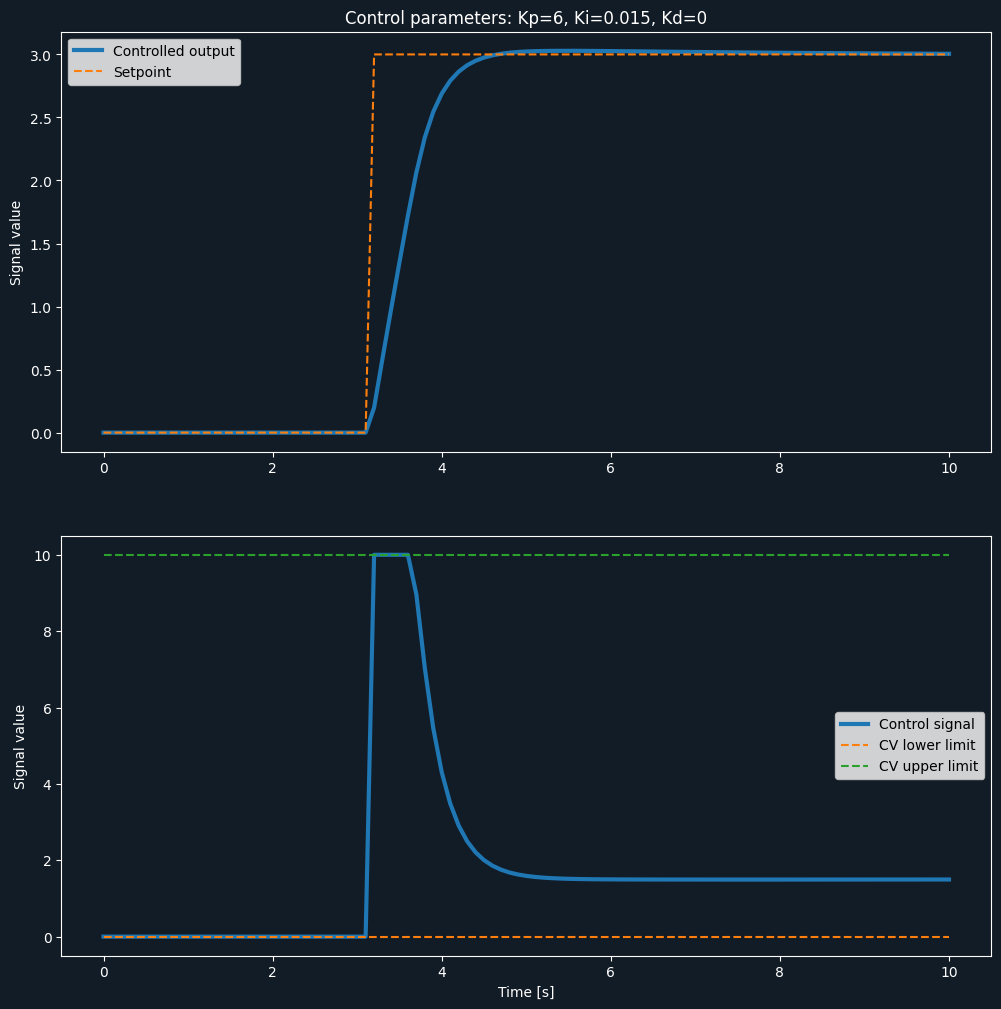

In [4]:
import Plotters as sim_plt
cm = {
    0 : [0, pid]
}
axes = sim_plt.plot_regulation_history(obj, cm, figsize=(12, 12))

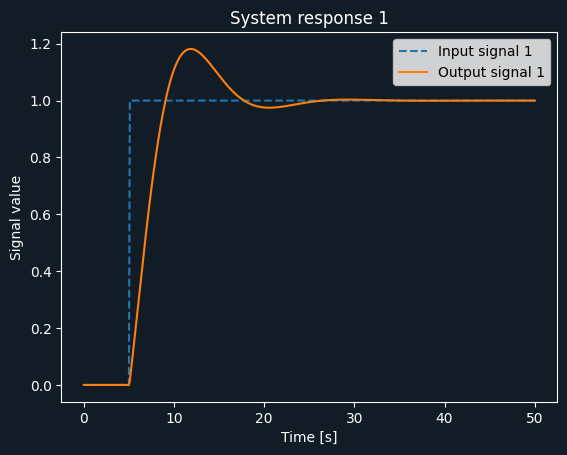

In [5]:
from Objects import TF_object
from scipy.signal import TransferFunction
from numpy_utils import converters
from Controllers import PID_controller
import Plotters as sim_plt


tf = TransferFunction([1.5, 1], [5.5, 2.5, 1])
tf_array = converters.to_array_converter().convert_any_type([[tf]])

obj2 = TF_object(tf_matrix=tf_array, sampling_time=0.1)

for t in range(0, 500):
    cv = 0 if t < 50 else 1
    obj2.simulate_step(cv)

sim_plt.plot_object_history(obj2)

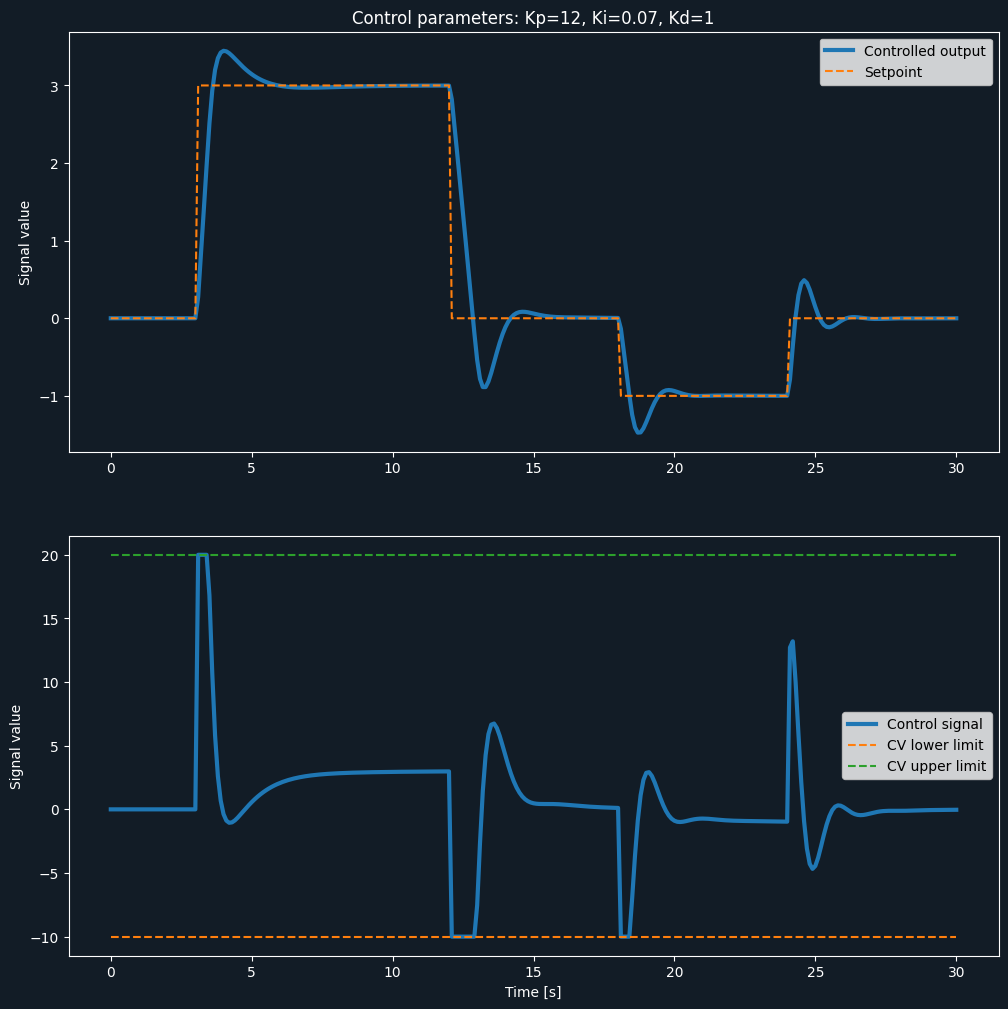

In [6]:
obj2.reset_history()
Kp = 12
Ki = 7e-2
Kd = 1
pid2 = PID_controller(Kp, Ki, Kd, setpoint=0, sample_time=0.1)
pid2.set_CV_limit(-10, 20)

for t in range(0, 300):
    if t == 30:
        pid2.set_setpoint(3)
    if t == 120:
        pid2.set_setpoint(0)
    if t == 180:
        pid2.set_setpoint(-1)
    if t == 240:
        pid2.set_setpoint(0)
    pv = obj2.get_output_hist()[-1][0][0]
    cv = pid2.simulate_step(pv)
    obj2.simulate_step(cv)

cm = {
    0 : [0, pid2]
}
axes = sim_plt.plot_regulation_history(obj2, cm, figsize=(12, 12))